# Buisness Problem


# Research Questions:
1. How should ER Games ensure they are in line with the trends of the industry?
2. Which market besides the US should ER Games target when releasing the game?
3. What impact does the changing preferences and demographics of the typical consumer have on the focus of ER Games?

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing Data and EDA

In [262]:
sales = pd.read_csv("Console.txt", sep="\t", encoding='mac_roman')

In [263]:
sales.info() # Missing values in critic score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8063 entries, 0 to 8062
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8063 non-null   object 
 1   platform         8063 non-null   object 
 2   year_of_release  8063 non-null   int64  
 3   genre            8063 non-null   object 
 4   publisher        8063 non-null   object 
 5   na_sales         8063 non-null   int64  
 6   eu_sales         8063 non-null   int64  
 7   jp_sales         8063 non-null   int64  
 8   other_sales      8063 non-null   int64  
 9   critic_score     6754 non-null   float64
 10  critic_count     6754 non-null   float64
 11  user_score       6390 non-null   float64
 12  user_count       6390 non-null   float64
 13  developer        8063 non-null   object 
 14  rating           8063 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 945.0+ KB


array([[<Axes: title={'center': 'year_of_release'}>,
        <Axes: title={'center': 'critic_score'}>],
       [<Axes: title={'center': 'critic_count'}>,
        <Axes: title={'center': 'user_score'}>],
       [<Axes: title={'center': 'user_count'}>, <Axes: >]], dtype=object)

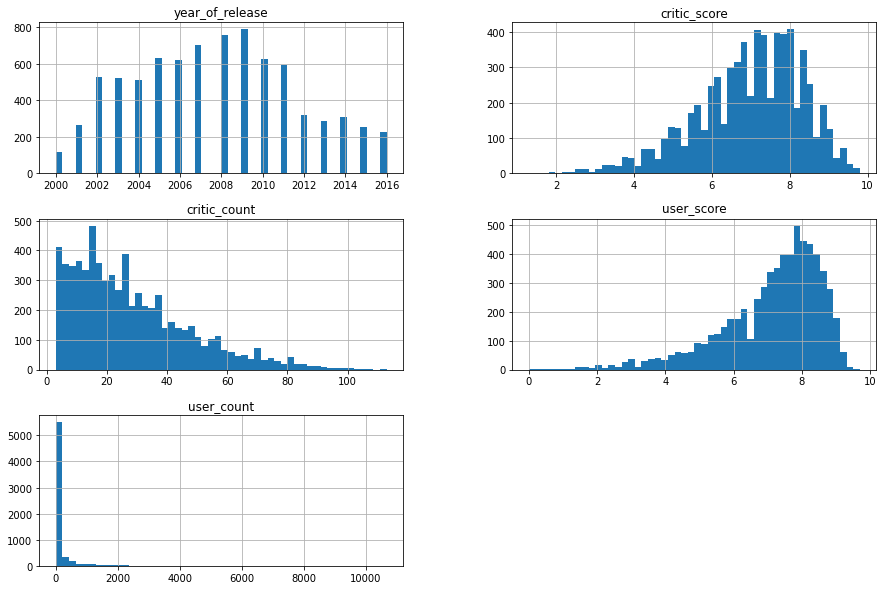

In [264]:
sales[["year_of_release","critic_score","critic_count","user_score","user_count"]].hist(bins=50, figsize=(15,10))

### Removing Duplicates

In [265]:
sales[sales["name"] == "pro evolution soccer 2011"] # Duplicates are prevelant but for different platforms 

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count,developer,rating
428,pro evolution soccer 2011,PS3,2010,Sports,Konami Digital Entertainment,290000,1170000,540000,410000,7.7,40.0,6.8,85.0,Konami,E
1660,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,50000,300000,290000,160000,7.4,10.0,5.8,5.0,Konami,E
2122,pro evolution soccer 2011,X360,2010,Sports,Konami Digital Entertainment,90000,440000,0,70000,7.9,43.0,5.9,33.0,Konami,E
2971,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,40000,210000,50000,110000,NaN,NaN,6.7,7.0,Konami,E
4366,pro evolution soccer 2011,Weii,2010,Sports,Konami Digital Entertainment,70000,100000,30000,20000,7.8,9.0,5.4,7.0,Konami,E


In [266]:
sales["name"].duplicated().sum() / sales.shape[0] # 41% of games are duplicates but different conosles 

0.41274959692422175

In [267]:
sales = sales.drop("platform",axis=1) # dropping platform so that we can keep game titles together

In [268]:
sales = sales.groupby(["name","year_of_release","genre","rating"]).agg(
    {"na_sales":"sum", "eu_sales":"sum","jp_sales":"sum",
    "other_sales":"sum", "critic_score":"mean","critic_count":"sum",
    "user_score":"mean","user_count":"sum"}).reset_index()

In [269]:
sales["name"].duplicated().sum() / sales.shape[0] # Now less 

0.07807632398753894

### Converting Sales to Per Capita Sales (100,000)

In [309]:
years = sales['year_of_release'].value_counts().reset_index()
years["percentage"] = years["count"] / years["count"].sum()
round(sum(list(years["year_of_release"] * years["percentage"]))) # Expected year is 2007 

2007

In [270]:
# From WorldOMeters.com
# change to 2009 
population_2009 = {
    "NA": 342_231_802,
    "EU": 734_902_805,
    "JP": 128_117_042
}

In [271]:
def transform_sales(data):
    data["na_sales"] = data["na_sales"].apply(lambda x: round(x / population_2009["NA"] * 100_000,2))
    data["eu_sales"] = data["eu_sales"].apply(lambda x: round(x / population_2009["EU"] * 100_000,2))
    data["jp_sales"] = data["jp_sales"].apply(lambda x: round(x / population_2009["JP"] * 100_000,2))

In [272]:
transform_sales(sales)

In [276]:
sales.drop("other_sales",axis=1) # we will drop this column since we cannot calculate sales per capita for "other"

,name,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,critic_score,critic_count,user_score,user_count
0,Tales of Xillia 2,2012,Role-Playing,T,58.44,16.33,351.24,7.1,59.0,7.90,216.0
1,.hack//Infection Part 1,2002,Role-Playing,T,143.18,51.71,202.94,7.5,35.0,8.50,60.0
2,.hack//Mutation Part 2,2002,Role-Playing,T,67.21,24.49,156.11,7.6,24.0,8.90,81.0
3,.hack//Outbreak Part 3,2002,Role-Playing,T,40.91,14.97,132.69,7.0,23.0,8.70,19.0
4,007 Racing,2000,Racing,T,87.66,27.21,0.00,5.1,16.0,4.60,14.0
...,...,...,...,...,...,...,...,...,...,...,...
5131,inFAMOUS: Second Son,2014,Action,T,374.02,133.35,54.64,8.0,90.0,7.90,2944.0
5132,nail'd,2010,Racing,E10+,46.75,5.44,0.00,6.5,85.0,6.65,29.0
5133,pro evolution soccer 2011,2010,Sports,E,157.79,302.08,710.29,7.7,102.0,6.12,137.0
5134,uDraw Studio,2010,Misc,E,482.13,77.56,0.00,7.1,9.0,NaN,0.0


Text(0.5, 1.0, 'Sales by Region Per 100,000 Population')

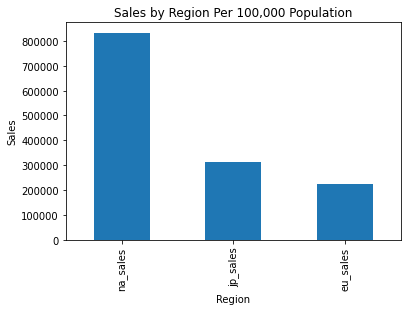

In [280]:
(sales[["na_sales","eu_sales","jp_sales"]].sum().sort_values(ascending=False)).plot(kind="bar")

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region Per 100,000 Population')

Regardless of population size NA dominates global sales of video games, followed by Japan, and Europe.

Text(0.5, 1.0, 'Sales by Region for Role-Playing Games Per 100,000')

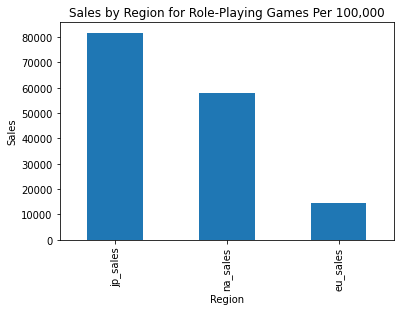

In [283]:
# Global Sales for Role-Playing 
role_playing = sales[sales["genre"] == "Role-Playing"]
role_playing[["na_sales","eu_sales","jp_sales"]].sum().sort_values(ascending=False).plot(kind="bar")


plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region for Role-Playing Games Per 100,000')

Japan has arond $80,000 worth of sales for every 100,000 people for puzzle games, while North America has around $60,000 per 100,000.

Text(0.5, 1.0, 'Sales by Region for Puzzle Games Per 100,000 Population')

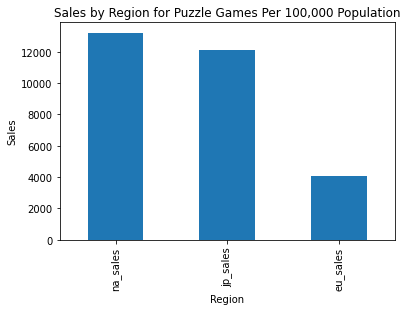

In [312]:
# Global Sales for Puzzle-Games
puzzle = sales[sales["genre"] == "Puzzle"]
puzzle[["na_sales","eu_sales","jp_sales"]].sum().sort_values(ascending=False).plot(kind="bar")


plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region for Puzzle Games Per 100,000 Population')

In [317]:
puzzle

,name,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count
8,100 All-Time Favorites,2009,Puzzle,E,102.27,16.33,0.00,40000,NaN,0.0,6.2,6.0
123,Angry Birds,2011,Puzzle,E,0.00,24.49,0.00,50000,NaN,0.0,7.3,19.0
126,Angry Birds: Rio,2011,Puzzle,E,0.00,9.53,0.00,20000,NaN,0.0,NaN,0.0
133,Animal Genius,2007,Puzzle,E,29.22,0.00,0.00,10000,NaN,0.0,NaN,0.0
156,Archer Maclean's Mercury,2005,Puzzle,E,49.67,32.66,0.00,140000,7.5,39.0,6.6,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,Yard Sale Hidden Treasures: Sunnyville,2010,Puzzle,E10+,29.22,0.00,0.00,10000,NaN,0.0,NaN,0.0
5090,Zendoku,2007,Puzzle,E,14.61,0.00,0.00,0,6.8,13.0,NaN,0.0
5105,Zoo Keeper,2004,Puzzle,E,29.22,1.36,39.03,10000,7.4,40.0,7.5,13.0
5113,ZooCube,2002,Puzzle,E,14.61,1.36,0.00,0,6.9,26.0,6.1,7.0


In [331]:
puzzle_by_rating = puzzle.groupby('rating').agg({"na_sales":"sum","eu_sales":"sum","jp_sales":"sum"})
puzzle_by_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,10715.01,2871.09,9335.22
E10+,2270.37,1121.22,2692.84
T,245.45,54.43,78.05


North America and Japan have similar value in Sales for every 100,000 people. 

In [323]:
puzzle = sales[sales["genre"] == "Puzzle"]
puzzle_by_rating = puzzle.groupby('rating').agg(["na_sales","jp_sales":"sum"])
puzzle_by_rating[["na_sales","eu_sales","jp_sales"]].sum().sort_values(ascending=False).plot(kind="bar",stacked=True)

SyntaxError: invalid syntax (624936221.py, line 2)

# Conclusions
1. 

2. ER games should target Japan as sales show that Role-Playing games perform very well in Japan. 

3. 
